## A simple convoluton network

For this network we will be using caltech dataset

Create a folder named 'caltech' in your './data/images' folder

Based on example code from 

https://www.tensorflow.org/tutorials/load_data/images

In [27]:
import tensorflow as tf
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import pathlib

DOWNLOAD_PATH = 'http://www.vision.caltech.edu/Image_Datasets/Caltech101/101_ObjectCategories.tar.gz'
STORE_PATH    = '/Users/gopisubramanian/Documents/Technology/tensorflow2/data/images/'
DATA_FILE     = 'caltech.tar.gz'


data_dir = tf.keras.utils.get_file(origin=DOWNLOAD_PATH, fname=DATA_FILE, \
                                   archive_format = 'tar', extract=True,
                                   cache_dir = STORE_PATH)
data_dir = pathlib.Path(STORE_PATH + '/datasets/101_ObjectCategories')




In [28]:
data_dir

PosixPath('/Users/gopisubramanian/Documents/Technology/tensorflow2/data/images/datasets/101_ObjectCategories')

In [29]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

9144

In [31]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

BATCH_SIZE = 16
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)


# Image under different labels are stored in different directories
ALL_CLASS_NAMES = [item.name for item in data_dir.glob('*')]

# For our problem we will restrict to these four classes
CLASS_NAMES     = np.array(['butterfly','dragonfly','crab','scorpion'])



train_data_gen = image_generator.flow_from_directory(directory=str(data_dir),
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))


Found 316 images belonging to 4 classes.


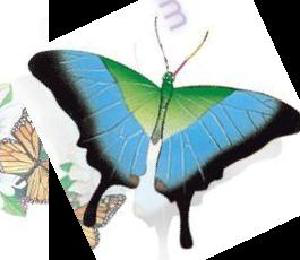

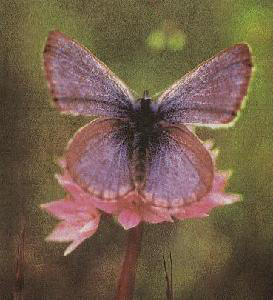

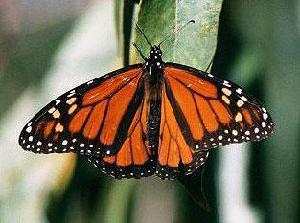

In [32]:

butterfly = list(data_dir.glob('./butterfly/*.jpg'))
for image_path in butterfly[:3]:
    display.display(Image.open(str(image_path)))


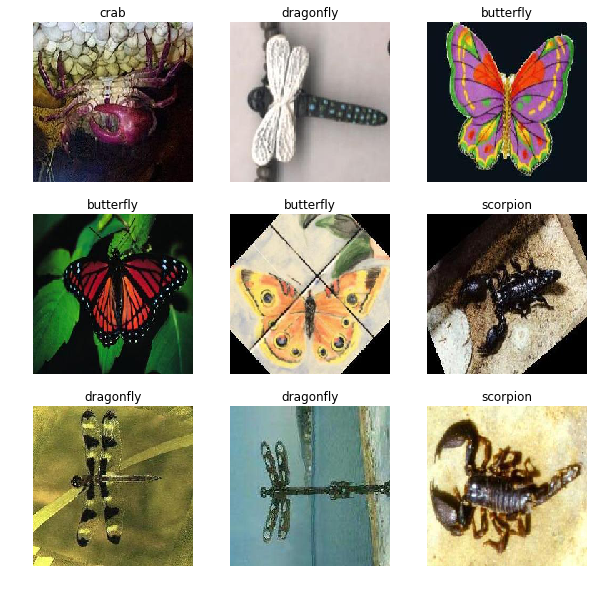

In [33]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(9):
      ax = plt.subplot(3,3,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0])
      plt.axis('off')

image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)


## Build a Model

tf.keras functional API



In [34]:
from tensorflow.keras import Input, layers, Model

img_input = Input((224,224,3))

x = layers.Conv2D(filters = 64, kernel_size = (11,11), padding ='valid', \
                 strides = (2,2), activation = 'relu', use_bias = True, \
                 kernel_initializer = 'glorot_uniform', bias_initializer = 'zero', \
                 )(img_input)

x = layers.Conv2D(filters = 32, kernel_size = (7,7), padding ='valid', \
                 strides = (2,2), activation = 'relu', use_bias = True, \
                 kernel_initializer = 'glorot_uniform', bias_initializer = 'zero', \
                 )(x)

x = layers.Conv2D(filters = 16, kernel_size = (3,3), padding ='valid', \
                 strides = (2,2), activation = 'relu', use_bias = True, \
                 kernel_initializer = 'glorot_uniform', bias_initializer = 'zero', \
                 )(x)


x = layers.Conv2D(filters = 9, kernel_size = (3,3), padding ='valid', \
                 strides = (1,1), activation = 'relu', use_bias = True, \
                 kernel_initializer = 'glorot_uniform', bias_initializer = 'zero', \
                 )(x)

x = layers.Conv2D(filters = 16, kernel_size = (3,3), padding ='valid', \
                 strides = (2,2), activation = 'relu', use_bias = True, \
                 kernel_initializer = 'glorot_uniform', bias_initializer = 'zero', \
                 )(x)

x = layers.Conv2D(filters = 8, kernel_size = (3,3), padding ='valid', \
                 strides = (2,2), activation = 'relu', use_bias = True, \
                 kernel_initializer = 'glorot_uniform', bias_initializer = 'zero', \
                 )(x)


x = layers.Conv2D(filters = 1, kernel_size = (3,3), padding ='valid', \
                 strides = (2,2), activation = 'relu', use_bias = True, \
                 kernel_initializer = 'glorot_uniform', bias_initializer = 'zero', \
                 )(x)

x = layers.Flatten()(x)


model = Model(img_input, x)

model.summary()

Model: "model_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_22 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_107 (Conv2D)          (None, 107, 107, 64)      23296     
_________________________________________________________________
conv2d_108 (Conv2D)          (None, 51, 51, 32)        100384    
_________________________________________________________________
conv2d_109 (Conv2D)          (None, 25, 25, 16)        4624      
_________________________________________________________________
conv2d_110 (Conv2D)          (None, 23, 23, 9)         1305      
_________________________________________________________________
conv2d_111 (Conv2D)          (None, 11, 11, 16)        1312      
_________________________________________________________________
conv2d_112 (Conv2D)          (None, 5, 5, 8)           116

In [40]:
from tensorflow.keras import losses

model.compile(optimizer='adam',
              loss= losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs = 10

history = model.fit(
    train_data_gen,
    epochs=epochs
)


  ...
    to  
  ['...']
Train for 20 steps
Epoch 1/10
20/20 [==============================] - 7s 331ms/step - loss: 1.2890 - accuracy: 0.4146
Epoch 2/10
20/20 [==============================] - 6s 324ms/step - loss: 1.2247 - accuracy: 0.4525
Epoch 3/10
20/20 [==============================] - 7s 337ms/step - loss: 1.1616 - accuracy: 0.4778
Epoch 4/10
20/20 [==============================] - 7s 335ms/step - loss: 1.1378 - accuracy: 0.5063
Epoch 5/10
20/20 [==============================] - 7s 338ms/step - loss: 1.1121 - accuracy: 0.5127
Epoch 6/10
20/20 [==============================] - 7s 342ms/step - loss: 1.1112 - accuracy: 0.4937
Epoch 7/10
20/20 [==============================] - 7s 334ms/step - loss: 1.0717 - accuracy: 0.5380
Epoch 8/10
20/20 [==============================] - 7s 340ms/step - loss: 1.0226 - accuracy: 0.5411
Epoch 9/10
20/20 [==============================] - 7s 338ms/step - loss: 0.9520 - accuracy: 0.6044
Epoch 10/10
20/20 [==============================] - 7s 

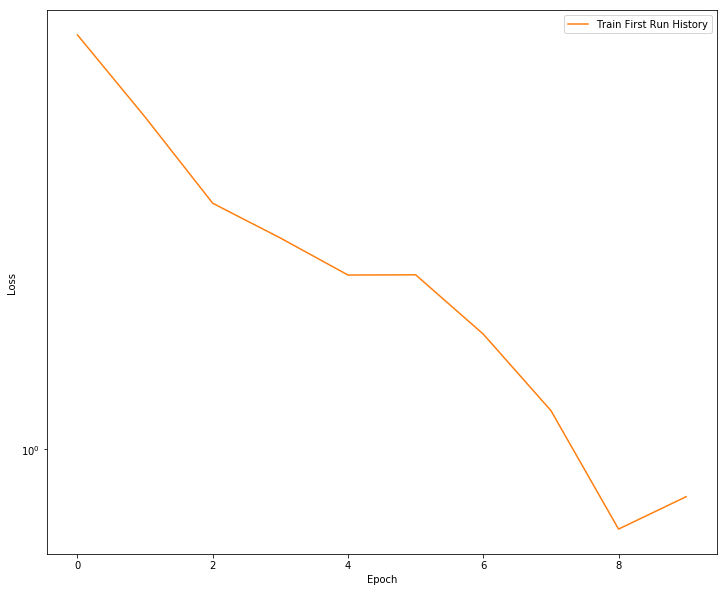

In [41]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


def plot_loss(history, label, n):
  # Use a log scale to show the wide range of values.
  plt.semilogy(history.epoch,  history.history['loss'],
               color=colors[n], label='Train '+label)
 # plt.semilogy(history.epoch,  history.history['val_loss'],
 #         color=colors[n], label='Val '+label,
 #         linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  
  plt.legend()

plot_loss(history, 'First Run History',1)

## Save Model

60% accuracy for the first run, not bad, let us save these intital weights.


In [43]:
model.save('./models/first_run', save_format='tf')
del model

INFO:tensorflow:Assets written to: ./models/first_run/assets


## Load Model

In [47]:
from tensorflow.keras.models import load_model

model = load_model('./models/first_run')




(16, 224, 224, 3)

In [49]:
image_batch, label_batch = next(train_data_gen)

prediction = model.predict(image_batch)

In [52]:
tf.nn.softmax(prediction[0])

<tf.Tensor: shape=(4,), dtype=float32, numpy=array([0.08018028, 0.01582331, 0.01409105, 0.88990533], dtype=float32)>

In [53]:
history = model.fit(
    train_data_gen,
    epochs=epochs
)

  ...
    to  
  ['...']
Train for 20 steps
Epoch 1/10
20/20 [==============================] - 7s 355ms/step - loss: 0.9410 - accuracy: 0.6392
Epoch 2/10
20/20 [==============================] - 7s 339ms/step - loss: 0.8968 - accuracy: 0.6266
Epoch 3/10
20/20 [==============================] - 7s 332ms/step - loss: 0.8279 - accuracy: 0.6741
Epoch 4/10
20/20 [==============================] - 7s 339ms/step - loss: 0.7576 - accuracy: 0.7184
Epoch 5/10
20/20 [==============================] - 7s 336ms/step - loss: 0.7502 - accuracy: 0.7184
Epoch 6/10
20/20 [==============================] - 7s 337ms/step - loss: 0.7444 - accuracy: 0.7310
Epoch 7/10
20/20 [==============================] - 7s 337ms/step - loss: 0.7104 - accuracy: 0.7342
Epoch 8/10
20/20 [==============================] - 7s 340ms/step - loss: 0.6589 - accuracy: 0.7437
Epoch 9/10
20/20 [==============================] - 7s 340ms/step - loss: 0.6031 - accuracy: 0.7595
Epoch 10/10
20/20 [==============================] - 7s 

## tf.keras.utils

Mention other utitliites present in this module